In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data = pd.read_csv("/kaggle/input/spoitfyss/SpotifyFeatures.csv")

cat_fet = ["key","liveness","mode","speechines","time_signature","artist_name","track_id","track_name"]

In [3]:
data[data.popularity == 0].artist_name.value_counts()

Johann Sebastian Bach      422
Image Sounds               353
Ron Komie                  171
Duo Libano                 158
Wolfgang Amadeus Mozart    135
                          ... 
Leo Dynamic1                 1
Leprincevxx                  1
Sophie Rose                  1
Gera MXM                     1
Spandau Ballet               1
Name: artist_name, Length: 6574, dtype: int64

In [4]:
data.drop_duplicates(["track_id"],inplace=True)# track_name ekstra aynı şarkının featleri var idleri aynı
data["liveness"] = pd.cut(data.liveness,[-1,0.8,2],labels=["record","live"])
data["speechines"] = pd.cut(data.speechiness,[-1,0.33,0.66,2],labels=["music","rap or others","others"])
data["cat_pop"] = pd.cut(data.popularity,[-1,50,75,101],labels=["low","medium","hard"])
data.duration_ms=data.duration_ms.apply(lambda x:x/ 1000/60)


In [5]:
print("Data Shape:",data.shape)
print("**Number of unique**")
for i in cat_fet:
    data[i] = data[i].astype(object)
    print(i,":",data[i].nunique())

Data Shape: (130326, 19)
**Number of unique**
key : 12
liveness : 2
mode : 2
speechines : 3
time_signature : 5
artist_name : 34599
track_id : 130326
track_name : 108691


In [6]:
data.groupby(["artist_name","cat_pop"]).count().query("cat_pop == 'hard'").sort_values("track_name",ascending=False)[:10]

,,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity,speechines
artist_name,cat_pop,,,,,,,,,,,,,,,,,
Khalid,hard,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24
Juice WRLD,hard,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22
Ariana Grande,hard,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19
Post Malone,hard,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18
Billie Eilish,hard,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17
Bad Bunny,hard,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13
Ozuna,hard,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12
6ix9ine,hard,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11
XXXTENTACION,hard,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10


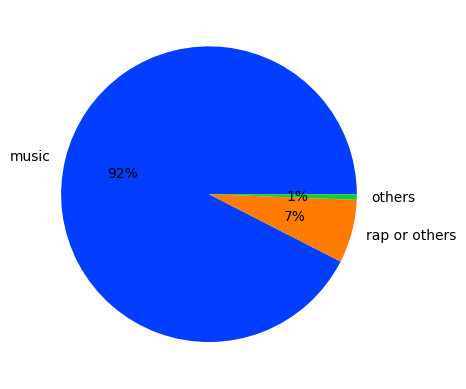

In [8]:
palette_color = sns.color_palette('bright')
plt.pie(data.speechines.value_counts(), labels=data.speechines.value_counts().index, colors=palette_color, autopct='%.0f%%')
  
# displaying chart
plt.show()

In [9]:
"artits_name:",data.artist_name.nunique(),"track_id:",data.track_id.nunique()

('artits_name:', 34599, 'track_id:', 130326)

In [10]:
# data.artist_name.value_counts()[10:].index
# data["artist_per"] = data.artist_name.apply(lambda x:x if x in data.artist_name.value_counts()[:10].index else "others")


# palette_color = seaborn.color_palette('bright')
# plt.pie(data.artist_per.value_counts(), labels=data.artist_per.value_counts().index, colors=palette_color, autopct='%.0f%%')
  
# # displaying chart
# plt.show()

In [11]:

# # sns.distplot( a=data.artist_name.value_counts()[:10], hist=True, kde=False, rug=False )

# palette_color = seaborn.color_palette('bright')
# plt.pie(data.artist_name.value_counts()[:10], labels=data.artist_name.value_counts()[:10].index, colors=palette_color, autopct='%.0f%%')
  

In [12]:
data_m = data[data.speechines == "music" ].copy()

In [13]:
feats = ["artist_name","acousticness","danceability","energy","instrumentalness","loudness","loudness","speechiness","tempo","valence","popularity"]
datas = data_m[feats]
data_mean  = datas.groupby(["artist_name"]).mean()

In [14]:
df = data_m.copy()
drop_feat = ["artist_name","track_id","track_name","cat_pop"]
cat_feat = ["key","liveness","mode","speechines","time_signature"]

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

for i in cat_feat:
    df[i]= label_encoder.fit_transform(df[i])

df.drop(drop_feat,axis=1,inplace=True)    

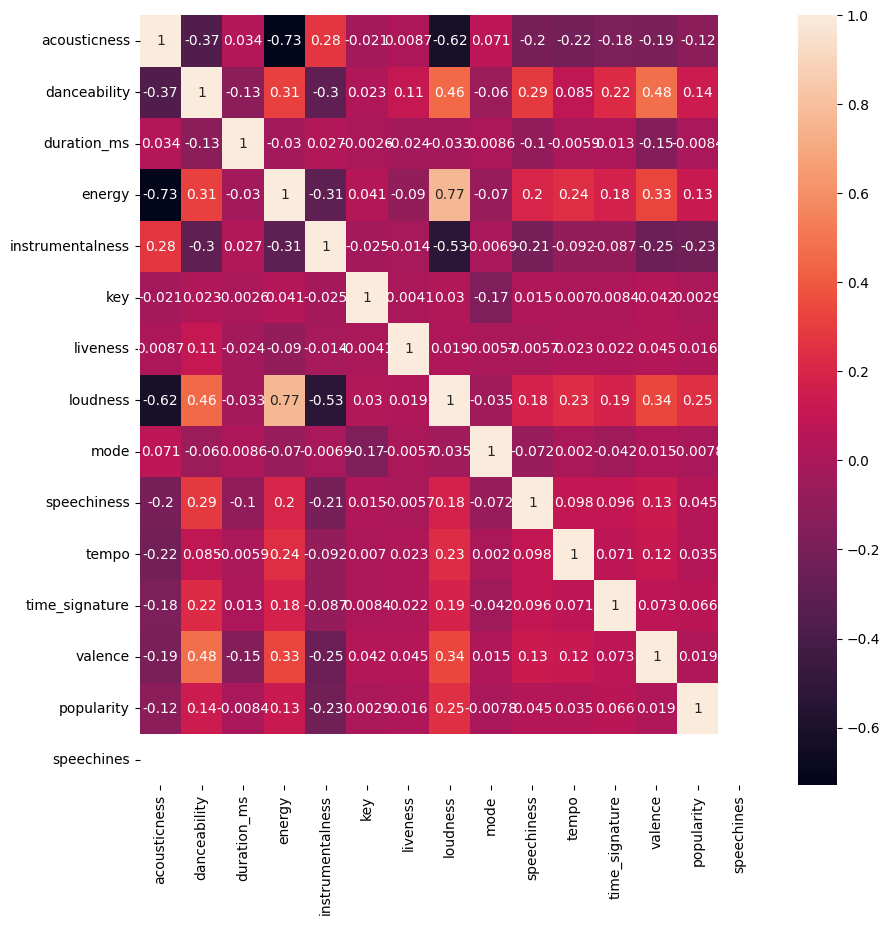

In [15]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

<BarContainer object of 14 artists>

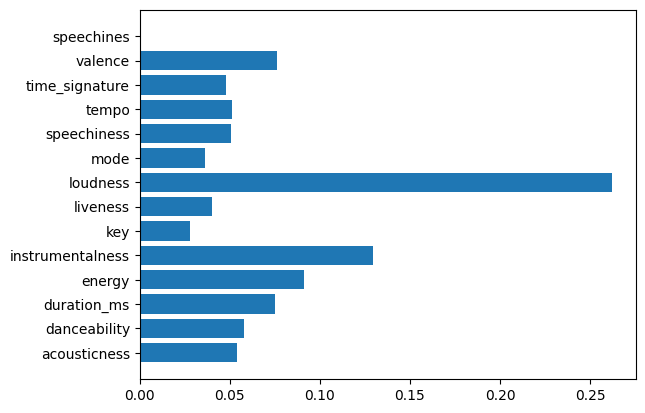

In [16]:
x = df.drop(["popularity"],axis=1)
y = df.popularity

import xgboost as xgb
xgbr = xgb.XGBRegressor(verbosity=0) 
xgbr.fit(x, y)
plt.barh(x.columns, xgbr.feature_importances_)

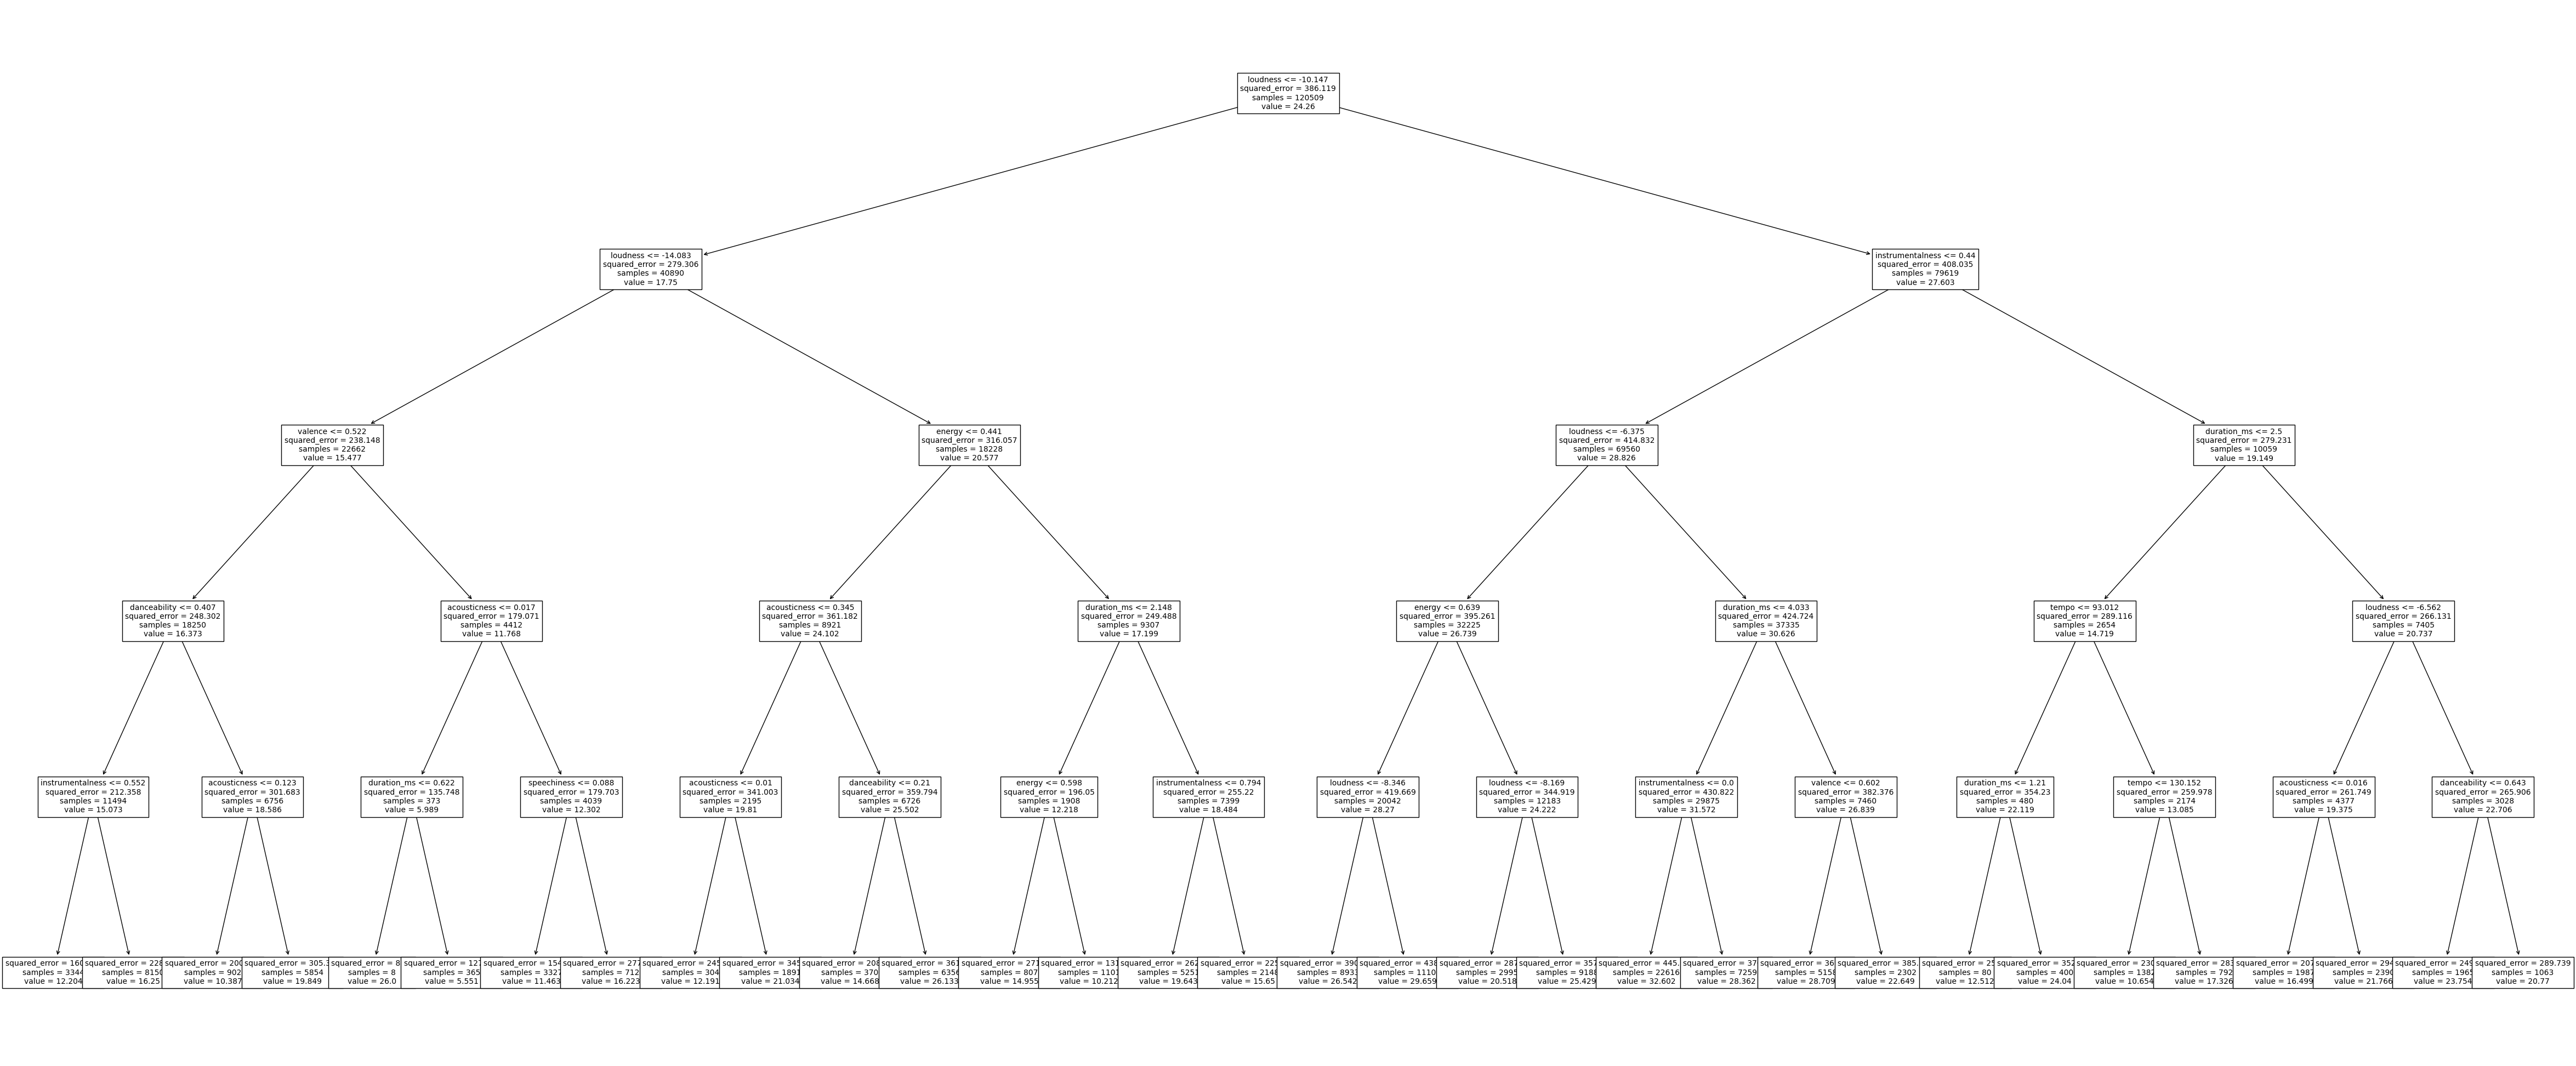

In [17]:
from sklearn.tree import DecisionTreeRegressor
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_2.fit(x, y)

from sklearn import tree
plt.figure(figsize=(60,25))  # set plot size (denoted in inches)
tree.plot_tree(regr_2, fontsize=10,feature_names=x.columns,class_names="Market Value")

plt.show()

In [18]:
# for i in data.select_dtypes(np.number).columns:
#     sns.distplot( a=data[i], hist=True, kde=False, rug=False )
#     plt.show()

In [19]:
#data.key -1 ->nota
#data.energy ->enerjikli metalik mesela
#data.liveness ->şarkının canlı performans olma durumu 0.8 üstü canlı sayılı
#data.mode 0,1 -> majör 1 minör 0
#data.speechines 0,33 altı müzik ,0.66 rap veya sözlüişler,0.66 üstü tamamen konuşla kitap şiir bla bla
#data.temp -> bpm
#data.time_sig -> zaman imzası 3/4lük filanns
#data.valence ->0 a yakın negatif şarkıar 1 e yakınlar pozitif şarkılar

#data.popularity 0 dan 100 e puan